In [8]:
import numpy as np
import matplotlib.pyplot as plt

# reproducibility
np.random.seed(42)

# parameters
N_BINS = 20 #NUMBER OF BINS
CITY_SIZE = 100.0

# generate bin positions
x = np.random.uniform(0, CITY_SIZE, N_BINS)
y = np.random.uniform(0, CITY_SIZE, N_BINS)

# generate fill levels (percent)
fill = np.random.uniform(0, 100, N_BINS)

bins = [
    {"id": i+1, "x": float(x[i]), "y": float(y[i]), "fill": float(fill[i])}
    for i in range(N_BINS)
]
depot = {"id": 0, "x": float(np.random.uniform(0, CITY_SIZE)), "y": float(np.random.uniform(0, CITY_SIZE))}
nodes = [depot] + bins
coords = np.array([[n["x"], n["y"]] for n in nodes], dtype=float)  # shape: (N+1, 2)

# pairwise Euclidean distances (N+1 x N+1)
diff = coords[:, None, :] - coords[None, :, :]
D = np.sqrt((diff ** 2).sum(axis=2))

In [10]:
print("Depot:", depot)
print("First bin:", bins[0])
print("D shape:", D.shape)
print("Depot -> bin1:", float(D[0, 1]))


Depot: {'id': 0, 'x': 38.8677289689482, 'y': 27.134903177389592}
First bin: {'id': 1, 'x': 37.454011884736246, 'y': 61.18528947223795, 'fill': 12.203823484477883}
D shape: (21, 21)
Depot -> bin1: 34.07972128440298


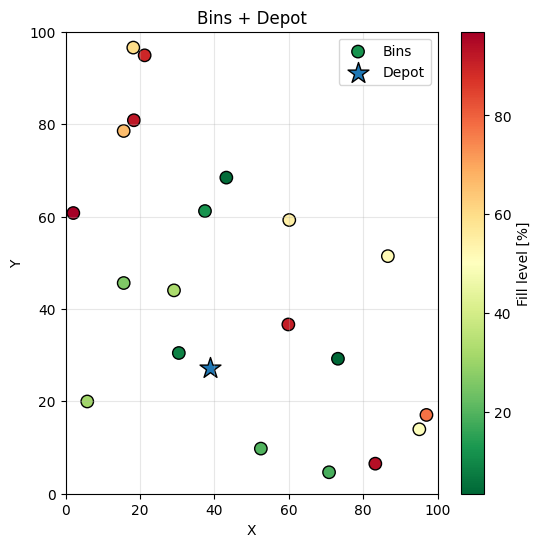

In [11]:
plt.figure(figsize=(6, 6))

sc = plt.scatter(
    [b["x"] for b in bins],
    [b["y"] for b in bins],
    c=[b["fill"] for b in bins],
    cmap="RdYlGn_r",
    s=80,
    edgecolors="black",
    label="Bins"
)

plt.scatter(depot["x"], depot["y"], marker="*", s=250, edgecolors="black", label="Depot")

plt.colorbar(sc, label="Fill level [%]")
plt.title("Bins + Depot")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, CITY_SIZE)
plt.ylim(0, CITY_SIZE)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [12]:
labels = ["Depot"] + [f"B{i+1}" for i in range(N_BINS)]

# header
print(f"{'':>7}", end="")
for lbl in labels:
    print(f"{lbl:>7}", end="")
print()

# rows
for i, lbl in enumerate(labels):
    print(f"{lbl:>7}", end="")
    for j in range(len(labels)):
        print(f"{D[i, j]:7.2f}", end="")
    print()


         Depot     B1     B2     B3     B4     B5     B6     B7     B8     B9    B10    B11    B12    B13    B14    B15    B16    B17    B18    B19    B20
  Depot   0.00  34.08  57.73  34.39  23.05  29.71  56.41  33.83  53.57  38.50  39.06  49.85  58.99  48.94  70.01  72.44  57.49   9.08  22.06  41.51  19.49
     B1  34.08   0.00  74.51  47.96  33.24  26.84  27.89  51.97  50.12  22.74  65.64  35.40  74.11  71.32  37.40  40.29  27.42  31.52  53.57   9.24  19.08
     B2  57.73  74.51   0.00  26.67  41.88  85.54 102.40  89.47  38.42  57.22  25.99 104.13   3.65  13.97 109.56 112.86 101.79  66.72  42.80  75.22  72.48
     B3  34.39  47.96  26.67   0.00  15.26  59.88  75.82  68.02  25.95  32.76  24.69  77.82  26.72  24.83  83.75  86.96  75.33  42.79  28.42  49.37  46.50
     B4  23.05  33.24  41.88  15.26   0.00  45.16  60.94  56.57  30.57  22.61  33.81  62.64  41.97  38.14  69.90  73.00  60.65  30.08  27.87  35.89  31.62
     B5  29.71  26.84  85.54  59.88  45.16   0.00  32.91  27.45  71.25